In [1]:
import sys, os
sys.path.insert(1, '/home/ning_a/Desktop/CAPTCHA/base_solver/base_solver_char')
import numpy as np
import torch
from torch.autograd import Variable
import captcha_setting
import my_dataset
from captcha_cnn_model import CNN, Generator
from torchvision.utils import save_image
import cv2 as cv
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from PIL import Image

/home/ning_a/.local/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


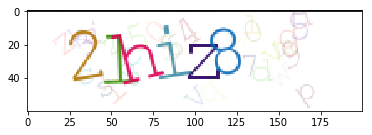

In [19]:
img = cv.imread('/home/ning_a/Desktop/CAPTCHA/dark_web_captcha/mania_data/2lhiz8.png')
#ret, thresh = cv.threshold(test_img,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
#ret, thresh = cv.threshold(gray,0,255,cv.THRESH_OTSU)
plt.imshow(img)
plt.show()

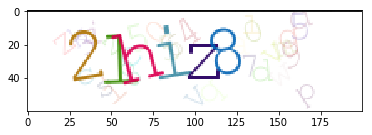

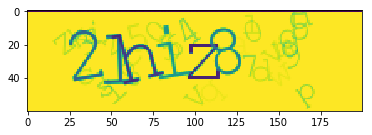

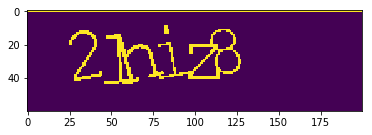

In [20]:
n_img = np.zeros((img.shape[0],img.shape[1]))
img_aft = cv.normalize(img, n_img, 0,255,cv.NORM_MINMAX)
plt.imshow(img_aft)
plt.show()

gray = cv.cvtColor(img_aft,cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
#ret, thresh = cv.threshold(gray,0,255,cv.THRESH_OTSU)

# thresh = cv.cvtColor(thresh,cv.COLOR_BGR2GRAY)
plt.imshow(thresh)
plt.show()

25 12 20 30
46 11 82 33


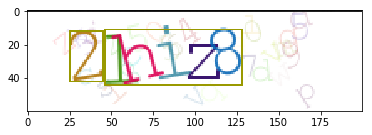

In [21]:
import copy
im2,contours,hierarchy = cv.findContours(thresh,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
filter_containor = []
temp_img = copy.deepcopy(img)
for i in range(0,len(contours)):  
    x, y, w, h = cv.boundingRect(contours[i])   
    newimage=img[y:y+h,x:x+w] # 先用y确定高，再用x确定宽
    nrootdir=("cut_image/")
    if h<5 or w<5:
        continue
    filter_containor.append([x, y, w, h])
    cv.rectangle(temp_img, (x,y), (x+w,y+h), (153,153,0), 1)
    if not os.path.isdir(nrootdir):
        os.makedirs(nrootdir)
    cv.imwrite( nrootdir+str(i)+".jpg",newimage) 
    print (x, y, w, h)
plt.imshow(temp_img)
plt.show()

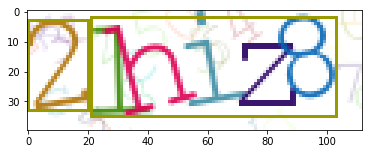

In [22]:
plt.imshow(temp_img[9:49,25:137])
plt.show()

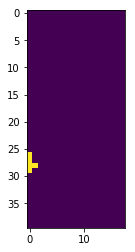

In [13]:
x=25 
y=9 
w=112 
h=40
avg_w = w//6
plt.imshow(thresh[y:y+h,x+3*avg_w:x+4*avg_w])
plt.show()